https://nbviewer.jupyter.org/urls/zgul.de/hypothesis-testing.ipynb

# Hypothesis Testing

In [2]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Setup plot default parameters

In [3]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=16)

np.random.seed(13)

## Simulation Based Approach
__Example__: Codeup produced a scratch off lottery ticket called "Golden Gitty-Up". The odds of winning are advertised to the state of Texas.
> If Codeup produced the tickets they know how tickets are 'winners' and how many are 'losers'

__Theory__: Our `population` is 1,000 tickets.

__Implementation__: Model the win/loss ratio using pandas Series
- 250 tickets -> Win
- 750 tickets -> Loss
- 25% chance of a 'Win' ticket
- 1 in 4 chance of a 'Win' ticket

The actual probability of winning is 25%


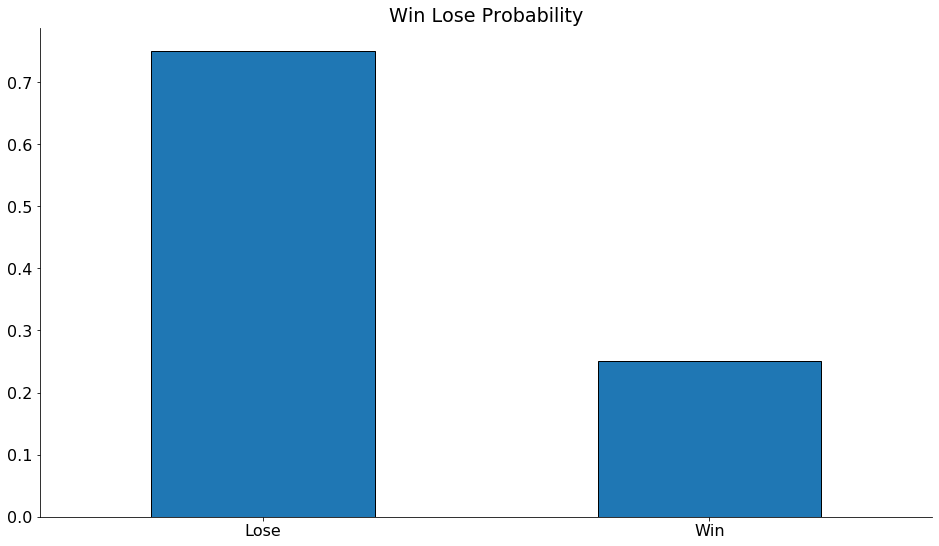

In [4]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts(normalize=True).set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is {:.0%}'.format(tickets.mean()))
plt.title('Win Lose Probability');

__Senario__:

Distributed to the town of Bronte, Texas, population 999. A hitchhiker is dropped off into town, receiving the last ticket.

__Theory__:

Take a random `sample` [BORING] and calculate the win rate. We're not going to see exactly 25% for each of our samples because they are just a piece of the population.
__Implementation__:

Use `pd.sample` to randomly choose 25 tickets, representing 25 Brontenites. Use `pd.mean` to calculate win rate of the sample.

In [5]:
citizens = 25
tickets.sample(citizens).mean()

0.12

__Senario__:
Each citizen in Bronte, Texas in is given a "Golden Gitty-Up".

__Theory__:
Each street is a portion of the population, 25 citizens each. The win rate, again, will not be exactly 25%.

__Implementation__:
Let's take a sample of one subdivision.

In [6]:
# this is a list comprehension that takes 5 random samples of 25 tickets.
[tickets.sample(citizens).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

__Theory__:
Let's repeat this experiment 10,000 times.
> Win rates are expected to be normally distributed.

__Implementation__:
Simulate 10,000 subdivisions, each subdivision has 25 citizens.

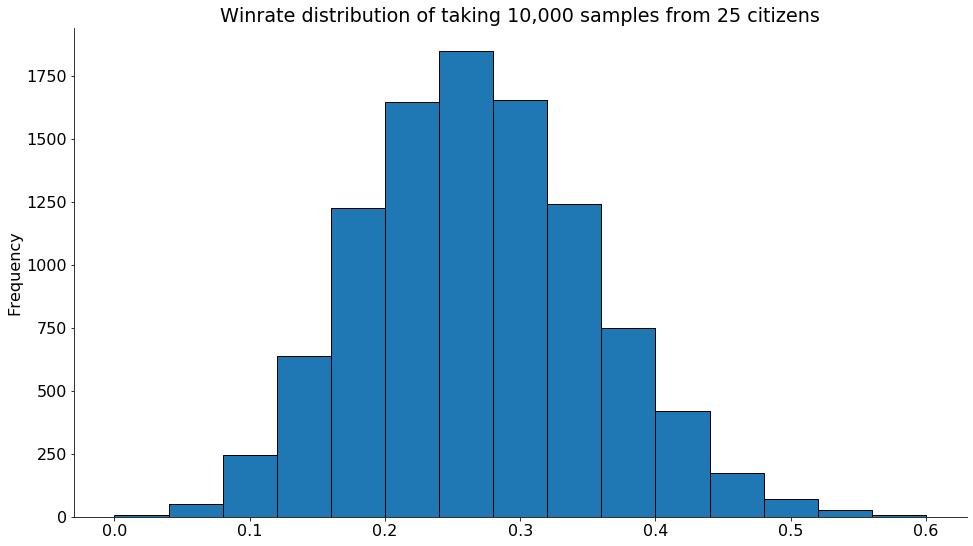

In [7]:
# simulation of 10,000 subdivision win rate

# Inside pd.Series, tickets.sample(citizens).mean() calculates the mean win rate of
# 1 sample/1 simulation. for _ in range(10_000) simulates 10,000 samples of a subdivision.
calculated_winrates = pd.Series([tickets.sample(citizens).mean() for _ in range(10_000)])

calculated_winrates.plot.hist(bins=15)
plt.title("Winrate distribution of taking 10,000 samples from 25 citizens");

## Mini Exercise -- Central Limit Theory


## 1.
>Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.

In [67]:
die_1 = np.array([1,2,3,4,5,6]).reshape(-1, 1)
die_2 = np.array([1,2,3,4,5,6])
probability = 1/36

theo_expected_value = ((die_1 + die_2) * probability).sum()
print("The expected average of 6 dice rolls is {:.2f}".format(theo_expected_value))

The expected average of 6 dice rolls is 7.00


In [68]:
die_1 + die_2

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

## 2.
>Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.

In [65]:
# Using random.choice to simulate a six-sided die
die_1 = stats.randint(1, 7).rvs(size=(10_000, 6))
die_2 = stats.randint(1, 7).rvs(size=(10_000, 6))
dice = die_1 + die_2

## 3.
> Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

The average of 6 dice rolls 10,000 times is 7.00


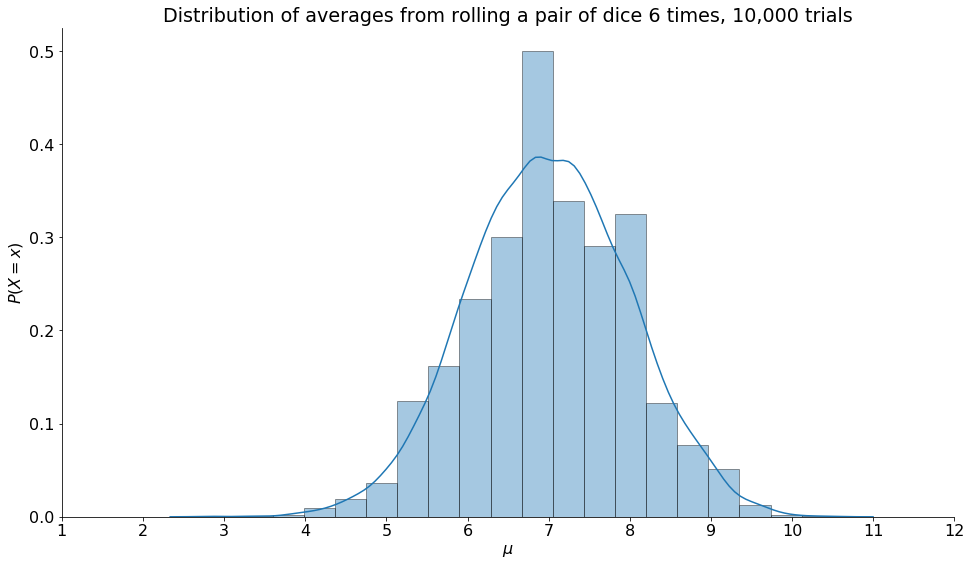

In [66]:
average = dice.mean(axis=1)
print("The average of 6 dice rolls 10,000 times is {:.2f}".format(dice.mean()))

sns.distplot(average, bins=20)

plt.title("Distribution of averages from rolling a pair of dice 6 times, 10,000 trials")
plt.xlabel('$\mu$')
plt.ylabel('$P(X=x)$')
plt.xticks(np.linspace(1, 12, 12));


__Theory__:

The __Central Limit Theorem__ will be normally distributed even if the underlying random variable is not.



For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

> Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## 1.
https://www.keycdn.com/support/what-is-latency

### Has the network latency gone up since we switched internet service providers?

__Null Hypothesis__: 

> \$H0$ Internet service providers have no effect on network latency.

__Alternative Hypothesis__:

> \$Ha$ Internet service providers effect network latency.

__True Positive__: Internet service providers _do not_ effect network latency.
> Fail to reject the Null Hypothesis

__False Positive__: Internet service providers _do_ effect network latency.
> Reject the Null Hypothesis

__Type I__:

> $\alpha$ Reject \$H0$ when Internet service providers __do not__ effect network latency.

__Type II__: 

> $\beta$ Accept \$H0$ when Internet service providers __do__ effect network latency.

## 2.
### Is the website redesign any good?

__Null Hypothesis__: 
> \$H0$ The website redesign has no effect on the number of daily visitors.

__Alternative Hypothesis__:
> \$Ha$ The website redesign increased the number of daily visitors.

__True Positive__: The website redesign has no effect on the number of daily visitors.
> Fail to reject the Null Hypothesis

__False Positive__: The website redesign increased the number of daily visitors.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H0$ when the website redesign has no effect on the number of daily visitors.

__Type II__: 
> $\beta$ Accept \$H0$ when the website redesign increased the number of daily visitors.

## 3.
### Is our television ad driving more sales?

__Null Hypothesis__: 
> \$H0$ The television ad had no effect on sales this month.

__Alternative Hypothesis__:

> \$Ha$ The television ad increased sales this month.

__True Positive__: The television ad had no effect on sales this month.
> Fail to reject the Null Hypothesis

__False Positive__: The television ad increased sales this month.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H0$ when the television ad had no effect on sales this month.

__Type II__: 
>$\beta$ Accept \$H0$ when the television ad increased sales this month.